# Setup

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')

In [11]:
from utils import savefig
# make a directory for figures
!mkdir -p figs

A subdirectory or file figs already exists.
Error occurred while processing: figs.


# Zero-dimensional CA

Here's a simple implementation of the 0-D CA, with one cell.

In [12]:
n = 10
x = np.zeros(n)
print(x)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


To get the state of the cell in the next time step, we increase the current state by 1 and take a modulo operation with 2, to make the state value changes between 0 and 1.

In [13]:
x[1] = (x[0] + 1) % 2
x[1]

1.0

In [14]:
x

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

Filling in the rest of the array.

In [15]:
for i in range(2, n):
    x[i] = (x[i-1] + 1) % 2 # modulo: divide and return the reminder
                            # result will be either 1 or 0
print(x)

[0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]


So the behavior of this CA is simple: it blinks.

# One-dimensional CA

Just as we used a 1-D array to show the state of a single cell over time, we'll use a 2-D array to show the state of a 1-D CA over time, **with one column per cell and one row per timestep.**

This 2D array is the stack of the generations of 1-D CA.

In [16]:
rows = 5
cols = 11
array = np.zeros((rows, cols), dtype=np.uint8)
print(array)

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


In [17]:
array[0, 5] = 1 # assign value 1 to the 6th element in first row
print(array)

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


In [36]:
def plot_ca(array):
    plt.imshow(array, cmap='Blues', interpolation='none')
    rows, cols = array.shape
    ax = plt.gca()

    # Major ticks
    ax.set_xticks(np.arange(0, cols, 1))
    ax.set_yticks(np.arange(0, rows, 1))

    # Labels for major ticks
    ax.set_xticklabels(np.arange(0, cols, 1))
    ax.set_yticklabels(np.arange(0, rows, 1))

    #! Add ticks, draw gridlined based on ticks, and then  remove marks -> only leave white gridlines behind
    # Minor ticks
    ax.set_xticks(np.arange(-.5, cols, 1), minor=True)
    ax.set_yticks(np.arange(-.5, rows, 1), minor=True)

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=4)

    # Remove minor ticks
    ax.tick_params(which='minor', bottom=False, left=False)

Here's what it looks like after we initialize the first row.

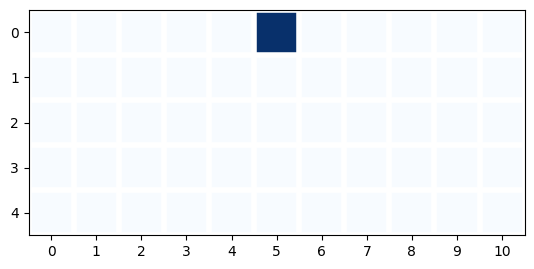

In [37]:
plot_ca(array)

And here's the function that fills in the next row.  **The rule for this CA is to take the sum of a cell and its two neighbors mod 2.**

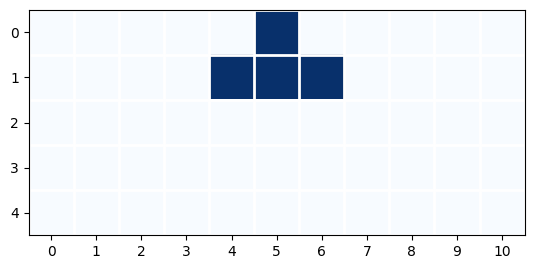

In [ ]:
# make the grid of cells
rows = 5
cols = 11
array = np.zeros((rows, cols), dtype=np.uint8)

# initialize cells' states
array[0, 5] = 1

# 1 time step evolution
row = array[0]
for j in range(1, cols):
    elts = row[j-1:j+2]
    array[1, j] = sum(elts) % 2

plot_ca(array)

In [ ]:
def step(array, i):
    """Compute row i of a CA.
    """
    rows, cols = array.shape
    row = array[i-1] # previous row
    for j in range(1, cols):
        elts = row[j-1:j+2] # extract the neighbor states from previous row
        array[i, j] = sum(elts) % 2
    print(array)

Here's the second row.

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


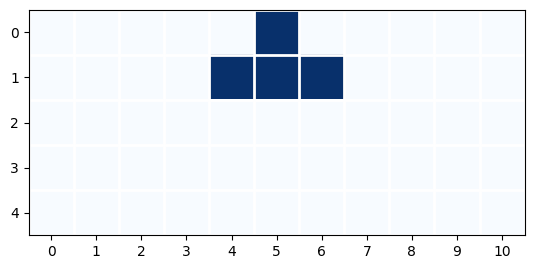

In [ ]:
step(array, 1)
plot_ca(array)

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 1 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


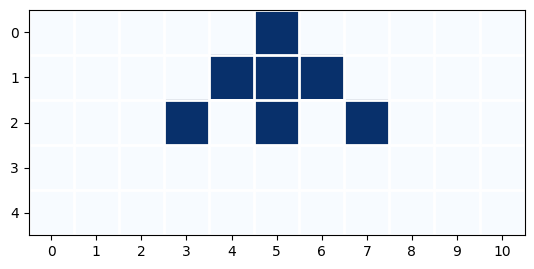

In [ ]:
step(array, 2)
plot_ca(array)

And here's what it looks like with the rest of the cells filled in.

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 1 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 1 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 1 0 1 0 1 0 0 0]
 [0 0 1 1 0 1 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 1 0 1 0 1 0 0 0]
 [0 0 1 1 0 1 0 1 1 0 0]
 [0 1 0 0 0 1 0 0 0 1 0]]


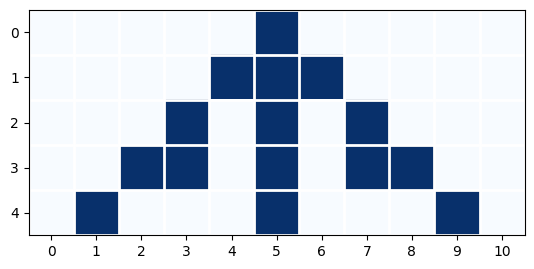

In [ ]:
for i in range(1, rows):
    step(array, i)

plot_ca(array)

For a simple set of rules, the behavior is more interesting than you might expect.

[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 

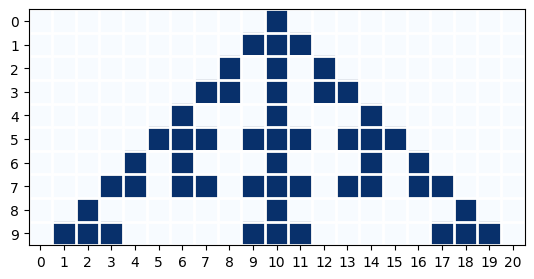

In [ ]:
# more timesteps

rows = 10
cols = 21
array = np.zeros((rows, cols), dtype=np.uint8)
array[0, 10] = 1 # assign value 1 to the 11th element in first row

for i in range(1, rows):
    step(array, i)

plot_ca(array)

# Cross correlation

We can update the CA more quickly using "cross correlation".  The cross correlation of an array, `a`, with a window, `w`, is a new array, `c`, where element `k` is:

$ c_k = \sum_{n=0}^{N-1} a_{k+n} \cdot w_n $

In Python, we can compute element `k` like this:

In [ ]:
def c_k(a, w, k):
    """Compute element k of the cross correlation of a and w.
    """
    N = len(w)
    return sum(a[k:k+N] * w)

To see how this works, I'll create an array:

In [ ]:
N = 10
row = np.arange(N, dtype=np.uint8)
print(row)

[0 1 2 3 4 5 6 7 8 9]


And a window:

In [ ]:
window = [1, 1, 1]

print(window)

[1, 1, 1]


With this window, each element of `c` is the sum of three neighbors in the array:

In [ ]:
c_k(row, window, 0)

3

In [ ]:
c_k(row, window, 1)

6

The following function computes the elements of `c` for all values of `k` where the window can overlap with the array:

In [ ]:
def correlate(row, window):
    """Compute the cross correlation of a and w.
    """
    cols = len(row)
    N = len(window)
    c = [c_k(row, window, k) for k in range(cols-N+1)]
    return np.array(c)

In [ ]:
c = correlate(row, window)
print(c)

[ 3  6  9 12 15 18 21 24]


In [ ]:
# compare with initial array
print(row)
print(c)

[0 1 2 3 4 5 6 7 8 9]
[ 3  6  9 12 15 18 21 24]


This operation is useful in many domains, so libraries like NumPy usually provide an implementation.  Here's the version from NumPy.

In [ ]:
c = np.correlate(row, window, mode='valid')
print(c)

[ 3  6  9 12 15 18 21 24]


With `mode='valid'`, the NumPy version does the same thing as mine: it only computes the elements of `c` where the window overlaps with the array.  A drawback of this mode is that the result size is smaller than `array`.

And alternative is `mode='same'`, which makes the result the same size as `array` by **extending array with zeros on both sides.**  Here's the result:

In [ ]:
# initial row --> [0 0 1 2 3 4 5 6 7 8 9 0]

c = np.correlate(row, window, mode='same')
print(c)

[ 1  3  6  9 12 15 18 21 24 17]


# Update with correlate

Now we can use `np.correlate` to update the array.  I'll start again with an array that contains one column for each cell and one row for each time step, and I'll initialize the first row with a single "on" cell in the middle:

In [ ]:
rows = 5
cols = 11
array = np.zeros((rows, cols), dtype=np.uint8)
array[0, 5] = 1
print(array)

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


Now here's a version of `step` that uses `np.correlate`

In [ ]:
# previous way to update the cell's state

def step(array, i):
    """Compute row i of a CA.
    """
    rows, cols = array.shape
    row = array[i-1] # previous row
    for j in range(1, cols):
        elts = row[j-1:j+2] # extract the neighbor states from previous row
        array[i, j] = sum(elts) % 2
    print(array)

In [ ]:
def step2(array, i, window=[1,1,1]):
    """Compute row i of a CA.
    """
    row = array[i-1]
    c = np.correlate(row, window, mode='same')
    array[i] = c % 2

And the result is the same.

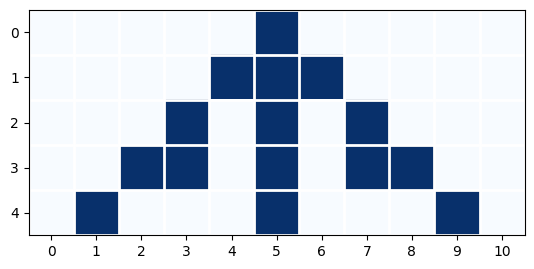

In [ ]:
for i in range(1, rows):
    step2(array, i)

plot_ca(array)

# CA Tables

What we have so far is good enough for a CA that only depends on the total number of "on" cells, but for more general CAs, we need a table that maps from the configuration of the neighborhood to the future state of the center cell.

The following function makes the table by interpreting the Rule number in binary.



[`np.unpackbits`](https://numpy.org/doc/stable/reference/generated/numpy.unpackbits.html) documentation



In [ ]:
# converts the rule number to its binary representation

def make_table(rule):
    """Make the table for a given CA rule.

    rule: int 0-255

    returns: array of 8 0s and 1s
    """
    rule = np.array([rule], dtype=np.uint8)
    table = np.unpackbits(rule)[::-1]
    return table

In [ ]:
rule = np.array([150], dtype=np.uint8)
np.unpackbits(rule)

array([1, 0, 0, 1, 0, 1, 1, 0], dtype=uint8)

In [ ]:
np.unpackbits(rule)[::-1]

array([0, 1, 1, 0, 1, 0, 0, 1], dtype=uint8)

Here's what it looks like as an array:

In [ ]:
table = make_table(150)
print(table)

[0 1 1 0 1 0 0 1]



**If we correlate the row with the window `[4, 2, 1]`, it treats each neighborhood as a binary number between 000 and 111.**

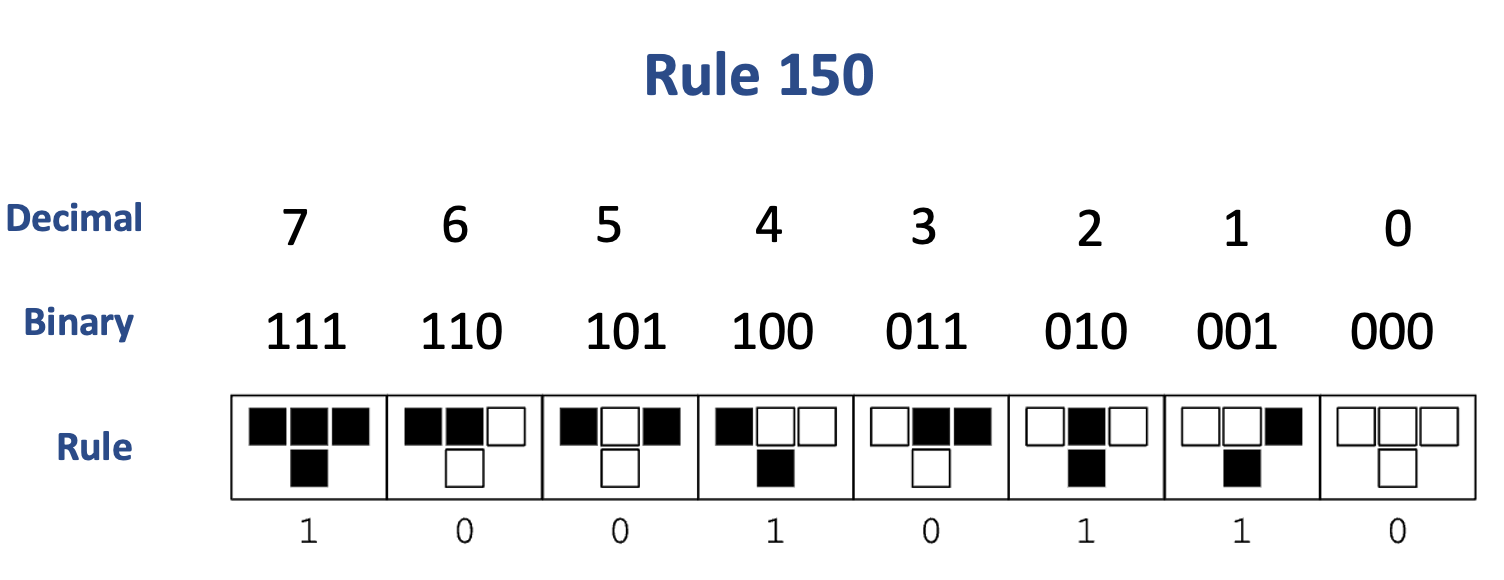

In [ ]:
rows = 5
cols = 11
array = np.zeros((rows, cols), dtype=np.uint8)
array[0, 5] = 1
print(array)

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
window = [4, 2, 1]
c = np.correlate(array[0], window, mode='same')
print(array[0])
print(c)

[0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 1 2 4 0 0 0 0]


Now we can use the result from `np.correlate` as an **index into the table**; the result is the next row of the array.

In [ ]:
table[c]

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0], dtype=uint8)

In [ ]:
array[1] = table[c]
print(array[1])

[0 0 0 0 1 1 1 0 0 0 0]


We can wrap up that code in a function:

In [ ]:
def step3(array, i, window=[4,2,1]):
    """Compute row i of a CA.
    """
    row = array[i-1]
    c = np.correlate(row, window, mode='same')
    array[i] = table[c]

And test it again.

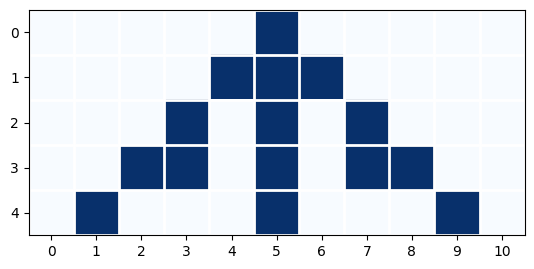

In [ ]:
for i in range(1, rows):
    step3(array, i)

plot_ca(array)

# The Cell1D object

`Cell1D` encapsulates the code from the previous section.

In [ ]:
class Cell1D:
    """Represents a 1-D a cellular automaton"""

    def __init__(self, rule, n, m=None):
        """Initializes the CA.

        rule: integer
        n: number of rows
        m: number of columns

        Attributes:
        table:  rule dictionary that maps from triple to next state.
        array:  the numpy array that contains the data.
        next:   the index of the next empty row.
        """
        self.table = make_table(rule)
        self.n = n
        self.m = 2*n + 1 if m is None else m

        self.array = np.zeros((n, self.m), dtype=np.int8)
        self.next = 0

    def start_single(self):
        """Starts with one cell in the middle of the top row."""
        self.array[0, self.m//2] = 1
        self.next += 1

    def start_random(self):
        """Start with random values in the top row."""
        self.array[0] = np.random.random(self.m).round()
        self.next += 1

    def start_string(self, s):
        """Start with values from a string of 1s and 0s."""
        # TODO: Check string length
        self.array[0] = np.array([int(x) for x in s])
        self.next += 1

    def loop(self, steps=1):
        """Executes the given number of time steps."""
        for i in range(steps):
            self.step()

    def step(self):
        """Executes one time step by computing the next row of the array."""
        a = self.array
        i = self.next
        window = [4, 2, 1]
        c = np.correlate(a[i-1], window, mode='same')
        a[i] = self.table[c]
        self.next += 1

    def draw(self, start=0, end=None):
        """Draws the CA using pyplot.imshow.

        start: index of the first column to be shown
        end: index of the last column to be shown
        """
        a = self.array[:, start:end]
        plt.imshow(a, cmap='Blues', alpha=0.7)

        # turn off axis tick marks
        plt.xticks([])
        plt.yticks([])

The following function makes and draws a CA.

In [ ]:
def draw_ca(rule, n=32):
    """Makes and draw a 1D CA with a given rule.

    rule: int rule number
    n: number of rows
    """
    ca = Cell1D(rule, n)
    ca.start_single()
    ca.loop(n-1)
    ca.draw()

Here's an example that runs a Rule 50 CA for 10 steps.

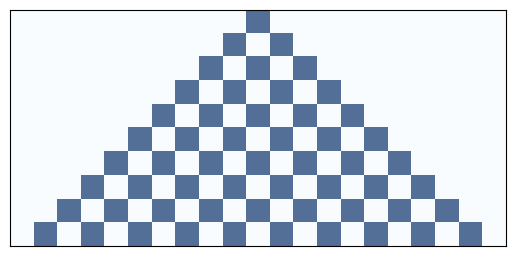

In [ ]:
draw_ca(rule=50, n=10)

Another example:

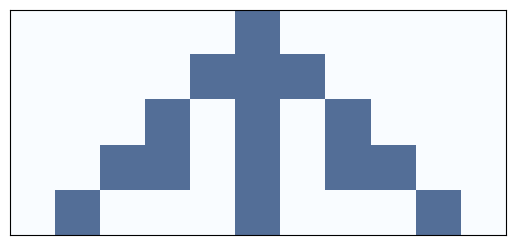

In [ ]:
draw_ca(rule=150, n=5)

And one more example showing **recursive structure.**

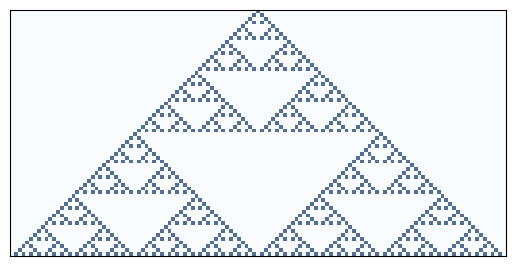

In [ ]:
draw_ca(rule=18, n=64)

Rule 30 generates a sequence of bits that is indistinguishable from **random**:

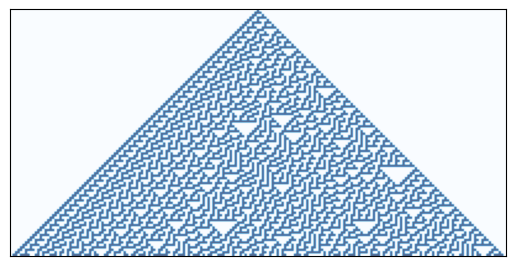

In [ ]:
draw_ca(rule=30, n=100)

And Rule 110:

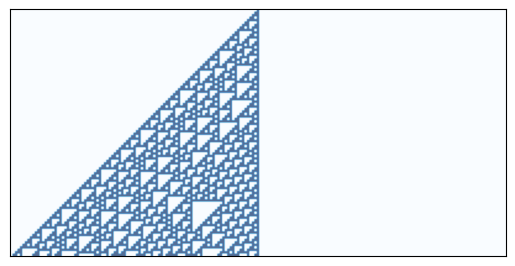

In [ ]:
draw_ca(rule=110, n=100)

Here's a longer run that has some spaceships.

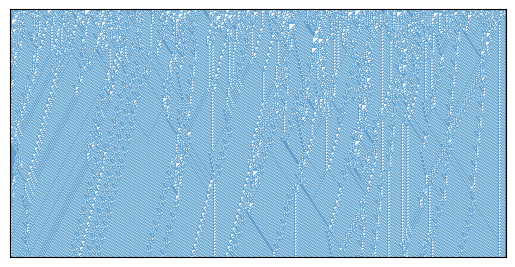

In [ ]:
np.random.seed(21)

n = 600
ca = Cell1D(rule=110, n=n)
ca.start_random()
ca.loop(n-1)
ca.draw()

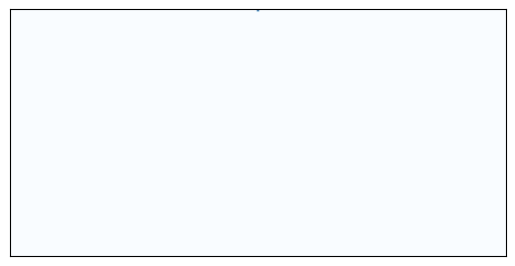

In [ ]:
draw_ca(rule=0, n=100)

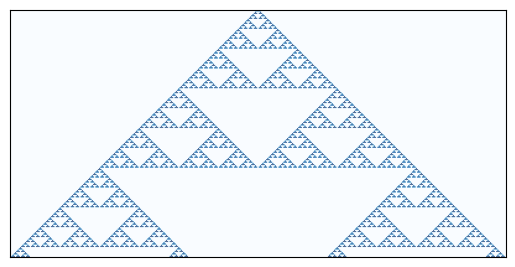

In [ ]:
draw_ca(rule=22, n=200)

# Exercises

Have a look at all other rules and try to replicate some:


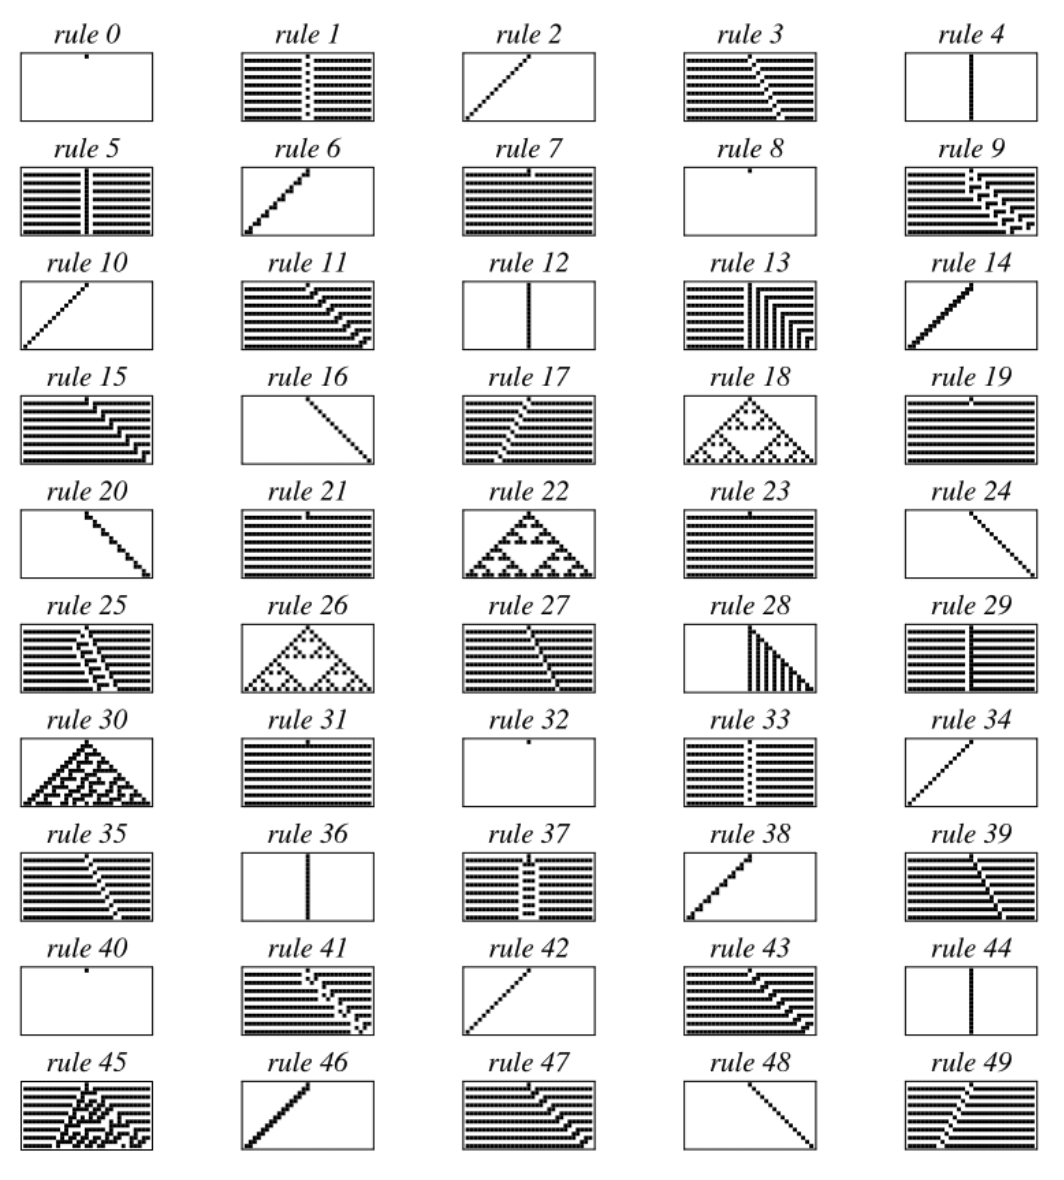

In [ ]:
draw_ca(rule = , n = )

In [ ]:
draw_ca(rule = , n = )

In [ ]:
draw_ca(rule = , n = )

## Try CellPyLib for Cellular Automata

**CellPyLib** is a library for working with Cellular Automata, for Python. The size of the neighbourhood can be adjusted. While cellular automata constitute a very broad class of models, this library focuses on those that are constrained to a regular array or uniform grid, such as elementary CA.

In [ ]:
!pip install cellpylib

  Preparing metadata (setup.py) ... done
  Created wheel for cellpylib: filename=cellpylib-2.4.0-py3-none-any.whl size=37921 sha256=987730916985ca3ef7b7cd3b6d3cb389d1ff5addc0e89b36cffb9da036b13265
  Stored in directory: /root/.cache/pip/wheels/44/bc/c4/4730d328071b164c25d392c2d932b513e56ff0857da63d17e7
Successfully built cellpylib


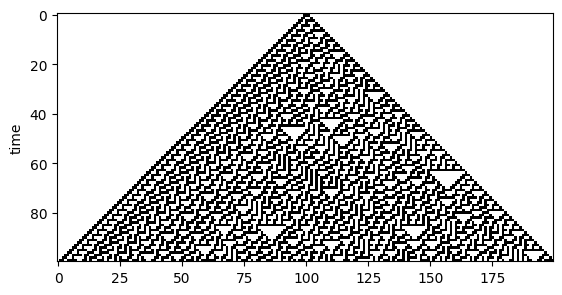

In [ ]:
import cellpylib as cpl

# initialize a CA with 200 cells (a random initialization is also available)
cellular_automaton = cpl.init_simple(200)

# evolve the CA for 100 time steps, using Rule 30 as defined in NKS
cellular_automaton = cpl.evolve(cellular_automaton, timesteps=100, memoize=True,
                                apply_rule=lambda n, c, t: cpl.nks_rule(n, 30))

# plot the resulting CA evolution
cpl.plot(cellular_automaton)


**Varying the Neighbourhood Size**

The size of the cell neighbourhood can be varied by setting the parameter r when calling the evolve function. The value of r represents the number of cells to the left and to the right of the cell under consideration. Thus, to get a neighbourhood size of 3, r should be 1, and to get a neighbourhood size of 7, r should be 3. As an example, consider the work of M. Mitchell et al., carried out in the 1990s, involving the creation (discovery) of a cellular automaton that solves the density classification problem: if the initial random binary vector contains more than 50% of 1s, then a cellular automaton that solves this problem will give rise to a vector that contains only 1s after a fixed number of time steps, and likewise for the case of 0s. A very effective cellular automaton that solves this problem most of the time was found using a Genetic Algorithm.

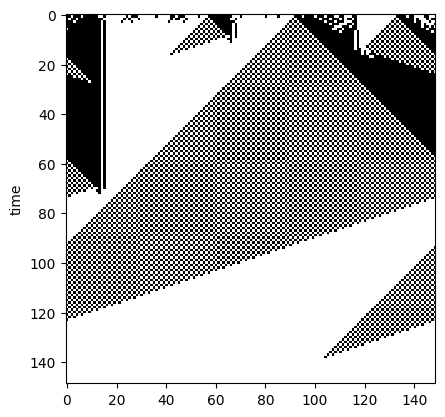

In [ ]:
import cellpylib as cpl

cellular_automaton = cpl.init_random(149)

# Mitchell et al. discovered this rule using a Genetic Algorithm
rule_number = 6667021275756174439087127638698866559

# evolve the CA, setting r to 3, for a neighbourhood size of 7
cellular_automaton = cpl.evolve(cellular_automaton, timesteps=149,
                                apply_rule=lambda n, c, t: cpl.binary_rule(n, rule_number), r=3)

cpl.plot(cellular_automaton)

**Varying the Number of States**

The number of states, or colors, that a cell can adopt is given by k. For example, a binary cellular automaton, in which a cell can assume only values of 0 and 1, has k = 2. CellPyLib supports any value of k. A built-in function, totalistic_rule, is an implementation of the [Totalistic cellular automaton](https://mathworld.wolfram.com/TotalisticCellularAutomaton.html) rule, as described in [Wolfram's NKS](https://www.wolframscience.com/nks/). The code snippet below illustrates using this rule. A value of k of 3 is used, but any value between (and including) 2 and 36 is currently supported. The rule number is given in base 10 but is interpreted as the rule in base k (thus rule 777 corresponds to '1001210' when k = 3).

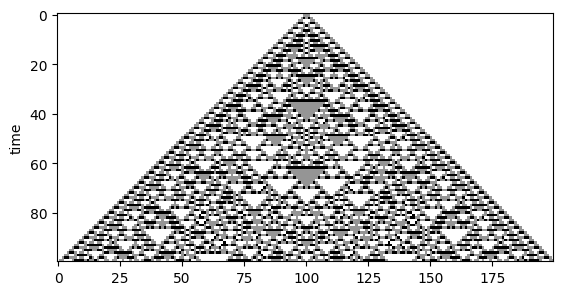

In [ ]:
import cellpylib as cpl

cellular_automaton = cpl.init_simple(200)

# evolve the CA, using totalistic rule 777 for a 3-color CA
cellular_automaton = cpl.evolve(cellular_automaton, timesteps=100,
                                apply_rule=lambda n, c, t: cpl.totalistic_rule(n, k=3, rule=777))

cpl.plot(cellular_automaton)